In [1]:
include("../../HamiltonODE.jl")

using Plots
pyplot();

Finished loading HamiltonSystem
Finished loading HamiltonSteps
Finished loading HamiltonIntegrator
Finished loading HamiltonPlot
Finished loading HamiltonInterpolate
Finished loading HamiltonODE


In [2]:
d = 2
m = (1)
q0 = [1.,0.]
p0 = [0.,1.]

F(q)= -q
U(q)= q⋅q/2
sol(q)=[cos(q),sin(q)]

HS = HamiltonSystem(d,m,q0,p0,F,U,sol);

In [3]:
T=2*2*pi
dt = 1e-1


Is = [
    Integrator(verlet_step,dt,T),
    Integrator(euler_step,dt,T),
    Integrator(i_euler_step,dt,T)
    ];

In [4]:
ts,Qs,Ps = integrate(HS,Is);

Integrating using verlet_step dt = 0.1...100%|██████████| Time: 0:00:01
Integrating using i_euler_step dt = 0.1...100%|█████████| Time: 0:00:00


In [5]:
names = getNames(Is)
EnergyErrors = getEnergyErrors(HS,Qs,Ps)
MaximumErrors = getMaximumErrors(HS,ts,Qs);

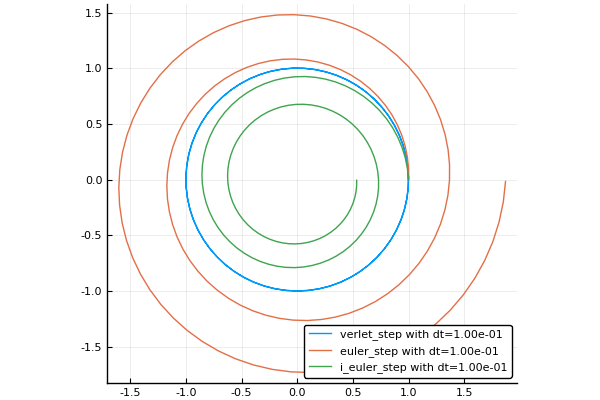

In [6]:
plotOrbits(Qs,names,aspect_ratio=:equal)

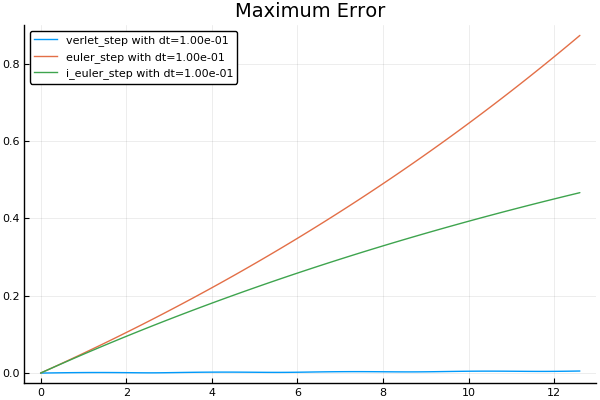

In [7]:
plot(ts,MaximumErrors,label = hcat(names...),title="Maximum Error")

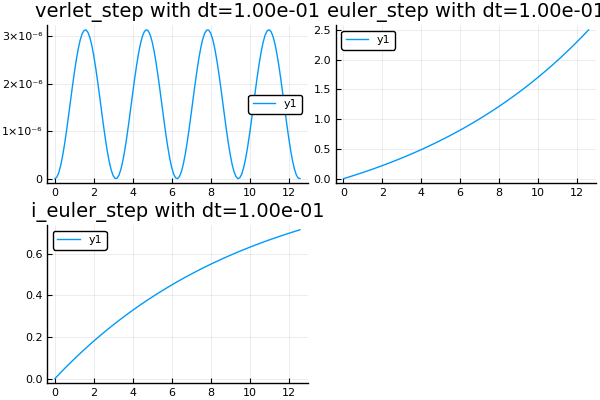

In [8]:
plotT(ts,EnergyErrors',names)